In [4]:
import os
os.environ['CONDA_PREFIX']

KeyError: 'CONDA_PREFIX'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import os
import subprocess
from datetime import datetime, timedelta
from itertools import chain
%matplotlib inline

KeyError: 'PROJ_LIB'

# Info about each simulation
221 points on a Latin hypercube of a 55-dim parameter space

In [10]:
df = pd.read_csv('UKESM_PPE_Unit.csv')

In [11]:
df

acure_bl_nuc  acure_ait_width  acure_cloud_ph  acure_carb_ff_ems  \
0        0.500000         0.650000        0.396000                  1   
1        0.470000         0.500000        0.500000                  1   
2        0.710941         0.195668        0.744666                  1   
3        0.713514         0.122973        0.756881                  1   
4        0.065089         0.901751        0.140694                  1   
..            ...              ...             ...                ...   
216      0.816662         0.515664        0.802905                  1   
217      0.028483         0.137400        0.238850                  1   
218      0.679848         0.425611        0.751152                  1   
219      0.813529         0.762110        0.246023                  1   
220      0.409228         0.468955        0.423126                  1   

     acure_carb_ff_ems_eur  acure_carb_ff_ems_nam  acure_carb_ff_ems_chi  \
0                 0.500000               0.500000               0.500000   
1                 0.530000               0.470000               0.530000   
2                 0.866502               0.499546               0.702679   
3                 0.049402               0.669009               0.915871   
4                 0.607080               0.878187               0.645853   
..                     ...                    ...                    ...   
216               0.566194               0.904549               0.687023   
217               0.738906               0.524011               0.356609   
218               0.268662               0.513833               0.008653   
219               0.742926               0.218260               0.983678   
220               0.062721               0.489329               0.683280   

     acure_carb_ff_ems_asi  acure_carb_ff_ems_mar  acure_carb_ff_ems_r  ...  \
0                 0.500000               0.500000             0.500000  ...   
1                 0.470000               0.530000             0.470000  ...   
2                 0.381856               0.226260             0.823332  ...   
3                 0.958563               0.954557             0.572697  ...   
4                 0.359752               0.206862             0.617028  ...   
..                     ...                    ...                  ...  ...   
216               0.970962               0.468842             0.779332  ...   
217               0.347080               0.029771             0.064047  ...   
218               0.023502               0.758725             0.252430  ...   
219               0.824760               0.640673             0.303962  ...   
220               0.005891               0.552428             0.133137  ...   

       bparam  two_d_fsd_factor  c_r_correl  acure_autoconv_exp_lwp  \
0    0.500000          0.400000    0.900000                0.275862   
1    0.500000          0.500000    0.500000                0.500000   
2    0.051761          0.001720    0.023990                0.581675   
3    0.073574          0.885934    0.607512                0.022532   
4    0.996706          0.521507    0.402584                0.042612   
..        ...               ...         ...                     ...   
216  0.753956          0.712585    0.230366                0.581164   
217  0.132397          0.583854    0.721477                0.225251   
218  0.070954          0.164458    0.795320                0.077113   
219  0.378429          0.002838    0.842069                0.409880   
220  0.803100          0.189925    0.099177                0.153182   

     acure_autoconv_exp_nd  dbsdtbs_turb_0        ai      m_ci  a_ent_1_rp  \
0                 0.605000        0.150000  0.514000  0.333333    0.460000   
1                 0.500000        0.500000  0.500000  0.500000    0.500000   
2                 0.065685        0.787827  0.043209  0.237119    0.115595   
3                 0.850375        0.093570  0.832532  0.368879    0.829428   
4                 0.002

In [12]:
df.columns

Index(['acure_bl_nuc', 'acure_ait_width', 'acure_cloud_ph',
       'acure_carb_ff_ems', 'acure_carb_ff_ems_eur', 'acure_carb_ff_ems_nam',
       'acure_carb_ff_ems_chi', 'acure_carb_ff_ems_asi',
       'acure_carb_ff_ems_mar', 'acure_carb_ff_ems_r', 'acure_carb_bb_ems',
       'acure_carb_bb_ems_sam', 'acure_carb_bb_ems_naf',
       'acure_carb_bb_ems_saf', 'acure_carb_bb_ems_bnh',
       'acure_carb_bb_ems_rnh', 'acure_carb_bb_ems_rsh', 'acure_carb_res_ems',
       'acure_carb_res_ems_chi', 'acure_carb_res_ems_asi',
       'acure_carb_res_ems_afr', 'acure_carb_res_ems_lat',
       'acure_carb_res_ems_r', 'acure_carb_ff_diam', 'acure_carb_bb_diam',
       'acure_carb_res_diam', 'acure_prim_so4_diam', 'acure_sea_spray',
       'acure_anth_so2', 'acure_anth_so2_chi', 'acure_anth_so2_asi',
       'acure_anth_so2_eur', 'acure_anth_so2_nam', 'acure_anth_so2_r',
       'acure_volc_so2', 'acure_bvoc_soa', 'acure_dms', 'acure_prim_moc',
       'acure_dry_dep_ait', 'acure_dry_dep_acc', 'acure_d

# Wrangling NetCDF files (aircraft measurements)

In [47]:
filename = './acure_aircraft/u-bs714_ens000/bs714a.flight_track_20170201.nc'

sample = nc.Dataset(filename, "r", format="NETCDF4")

print(sample)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    dimensions(sizes): dim0(116)
    variables(dimensions): float64 latitude(dim0), float64 time(dim0), float64 longitude(dim0), float64 altitude(dim0), float64 model_level_number(dim0), float64 number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air(dim0), float64 mass_fraction_of_sulfuric_acid_in_soluble_nucleation_mode_dry_aerosol_in_air(dim0), float64 number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air(dim0), float64 mass_fraction_of_sulfuric_acid_in_soluble_aitken_mode_dry_aerosol_in_air(dim0), float64 mass_fraction_of_black_carbon_in_soluble_aitken_mode_dry_aerosol_in_air(dim0), float64 mass_fraction_of_particulate_organic_matter_in_soluble_aitken_mode_dry_aerosol_in_air(dim0), float64 number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air(dim0), float64 mass_fraction_of_sulfuric_acid_in_soluble_accum

In [45]:
sample.variables['latitude'][:].data.shape

(116,)

In [46]:
sample.variables['longitude'][:].data

array([209.9705884 , 209.83022333, 209.63443817, 209.47941367,
       209.241243  , 208.921974  , 208.57845267, 208.22376008,
       207.85274867, 207.4711485 , 207.07193533, 206.65737608,
       206.23112558, 205.79404275, 205.3602825 , 204.92824433,
       204.51278092, 204.107604  , 203.70583733, 203.30475017,
       202.90507392, 202.50857483, 202.12239042, 201.74918392,
       201.3858245 , 201.02282492, 200.65919308, 200.29854717,
       199.94926192, 199.6088995 , 199.28392858, 198.975308  ,
       198.68158583, 198.40521708, 198.14259892, 197.89629367,
       197.72459433, 197.55295075, 197.35793   , 197.17766458,
       197.17997008, 197.23452725, 197.29487417, 197.30987733,
       197.18525008, 197.29589567, 197.45752908, 197.64250133,
       197.83154767, 198.02963275, 198.24091992, 198.44934642,
       198.66430825, 198.872107  , 199.08900533, 199.300928  ,
       199.52354525, 199.73760758, 199.95285883, 200.16628017,
       200.38046542, 200.593905  , 200.79654458, 200.98

# Plotting maps

This is a great page: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


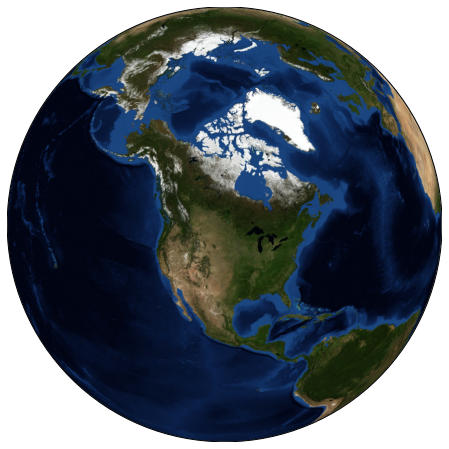

In [8]:
plt.figure(figsize=(8,8))
m = Basemap(projection="ortho", resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


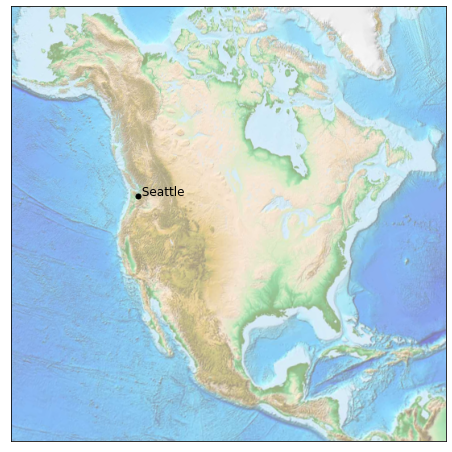

In [10]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [14]:
# define function to draw world map with lat and long lines
def draw_map(m, scale=0.2):
    
    # draw shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs as dictionary
    lats = m.drawparallels(np.linspace(-90,90,13))
    lons = m.drawmeridians(np.linspace(-180,180,13))
    
    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through lines and set style
    for line in all_lines:
        line.set(linestyle="-", alpha=0.3, color='w')

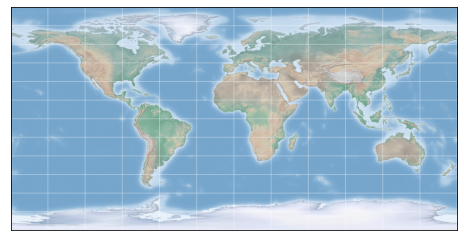

In [18]:
# cylindrical projection: cyl, cea
# additional values are lats and longs for the corners
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

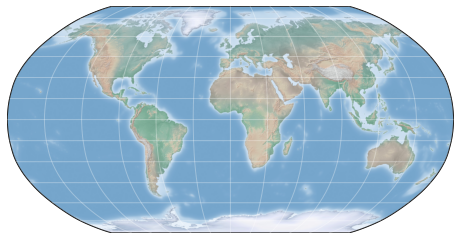

In [21]:
# pseudo-cylindrical projections: moll, sinu, robin
# additional parameters are the central lat and long
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='robin', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

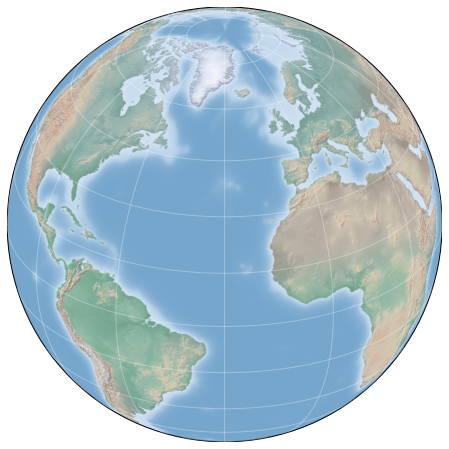

In [32]:
# perspective projections: ortho, gnom, stere
# additional parameters may vary
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=28, lon_0=-30)
draw_map(m);

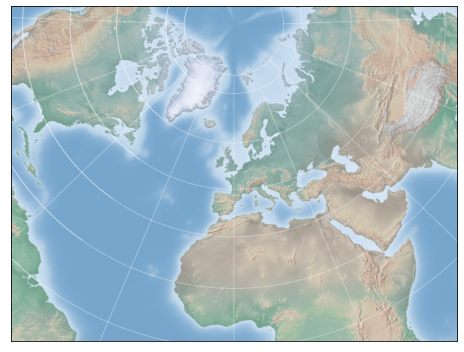

In [37]:
# conic projections: llc, eqdc, aea
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

# Plotting data on maps

In [48]:
filename = './acure_aircraft/u-bs714_ens000/bs714a.flight_track_20170201.nc'

sample = nc.Dataset(filename, "r", format="NETCDF4")

print(sample)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    dimensions(sizes): dim0(116)
    variables(dimensions): float64 latitude(dim0), float64 time(dim0), float64 longitude(dim0), float64 altitude(dim0), float64 model_level_number(dim0), float64 number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air(dim0), float64 mass_fraction_of_sulfuric_acid_in_soluble_nucleation_mode_dry_aerosol_in_air(dim0), float64 number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air(dim0), float64 mass_fraction_of_sulfuric_acid_in_soluble_aitken_mode_dry_aerosol_in_air(dim0), float64 mass_fraction_of_black_carbon_in_soluble_aitken_mode_dry_aerosol_in_air(dim0), float64 mass_fraction_of_particulate_organic_matter_in_soluble_aitken_mode_dry_aerosol_in_air(dim0), float64 number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air(dim0), float64 mass_fraction_of_sulfuric_acid_in_soluble_accum

In [49]:
lat = sample.variables['latitude'][:].data
lon = sample.variables['longitude'][:].data

In [51]:
lat.mean()

51.94712739655173

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


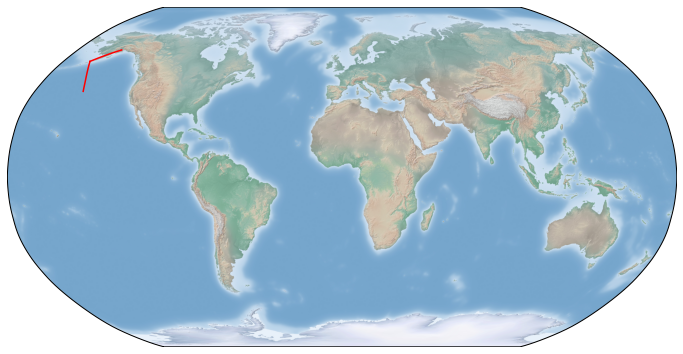

In [62]:
# 1. Draw the map background
fig = plt.figure(figsize=(12, 12))
#m = Basemap(projection='lcc', 
#            lat_0=lat.mean(), lon_0=lon.mean(),
#            width=1E6, height=1E6)
m = Basemap(projection='robin', resolution=None,
            lat_0=0, lon_0=0)
m.shadedrelief()

# 2. Scatter aircraft measurements
m.plot(lon, lat, latlon=True, color='red')

## Now do that for all the flights in an Ensemble

In [101]:
root_path = "./acure_aircraft/u-bs714_ens000/"
ls = subprocess.run(['ls', root_path], capture_output=True)
ls = str(ls.stdout).replace('\\n',",")
ls = ls[2:-2]
ls = ls.split(",")
files = ls

dates = []
for file in files:
    date = file[-11:-3]
    date = datetime.strptime(date, '%Y%m%d')
    dates.append(date)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


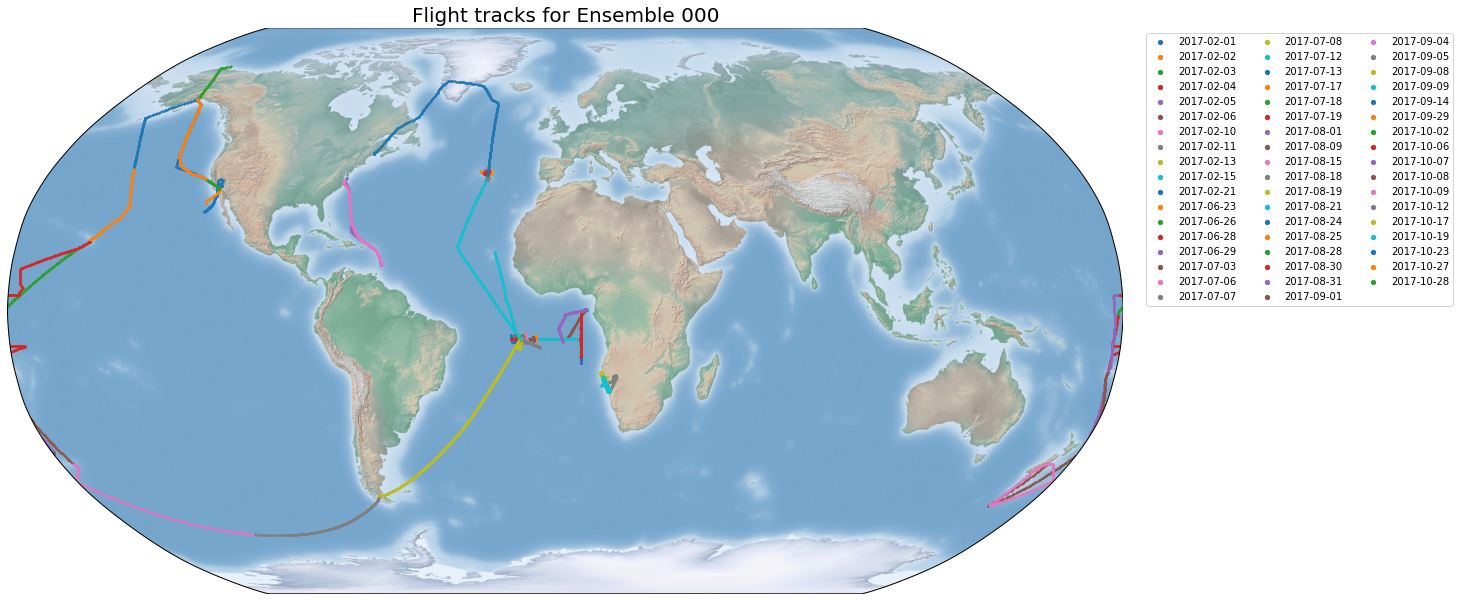

In [207]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='robin', resolution=None, lon_0=0)
m.shadedrelief()

for i,file in enumerate(files):
    filename = root_path + file
    sample = nc.Dataset(filename, "r", format="NETCDF4")
    lat = np.array(sample.variables['latitude'][:].data,dtype=np.float64)
    lon = sample.variables['longitude'][:].data
    #x, y= m(lon, lat)
    #m.scatter(x, y, label=filename[-11:-3])
    m.scatter(lon, lat, latlon=True, s=2, label=dates[i].date())

plt.title("Flight tracks for Ensemble 000", fontsize=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), ncol=3, markerscale=3)

## Now do it for all Ensembles

In [225]:
root_path = "./acure_aircraft/"
ls = subprocess.run(['ls', root_path], capture_output=True)
ls = str(ls.stdout).replace('\\n',",")
ls = ls[2:-2]
ls = ls.split(",")
ens_names=ls

ens_codes = []
for ens in ens_names:
    ens_codes.append(ens[-3:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


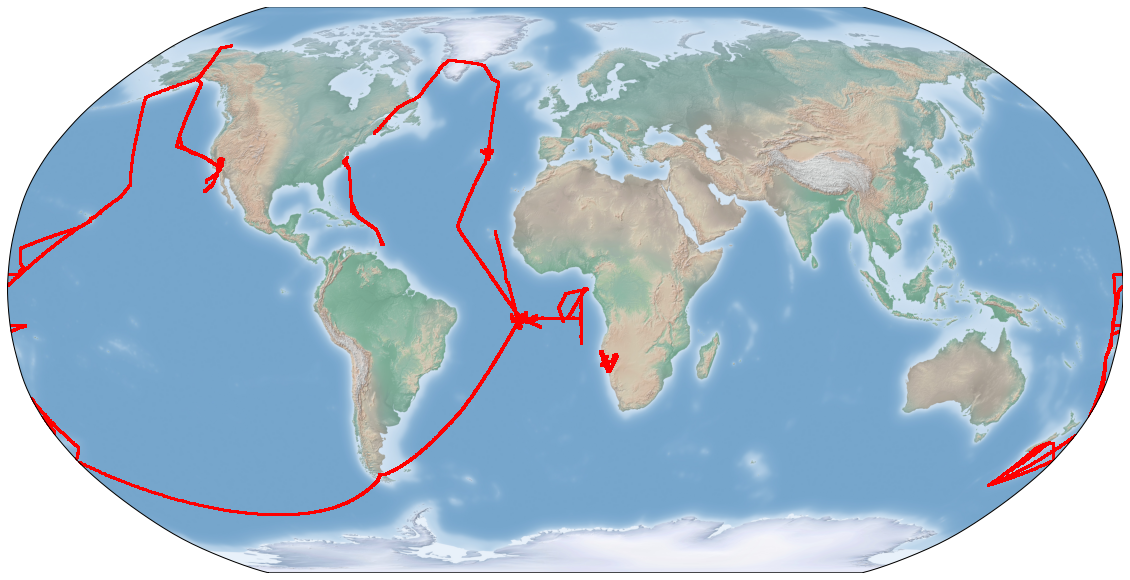

In [280]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='robin', resolution=None, lon_0=0)
m.shadedrelief()

for i, ens_name in enumerate(ens_names):
    ens_path = root_path + ens_name + '/*nc'
    cmd = 'ls ' + ens_path
    ls = subprocess.run(cmd, capture_output=True, shell=True)
    ls = str(ls.stdout).replace('\\n',",")
    ls = ls[2:-2]
    ls = ls.split(",")
    for i in range(len(ls)):
        ls[i] = ls[i][32:]
    files = ls
    for file in files:
        filename = root_path + ens_name + "/" + file
        sample = nc.Dataset(filename, "r", format="NETCDF4")
        lat = np.array(sample.variables['latitude'][:].data,dtype=np.float64)
        lon = sample.variables['longitude'][:].data
        m.scatter(lon, lat, latlon=True, s=2, label=ens_codes[i],c='red')

# Following Hamish's plan

### Initial mining

In [19]:
# defining target variables and time
target_variable = "mass_fraction_of_black_carbon_in_soluble_accumulation_mode_dry_aerosol_in_air"
target_time = datetime(2017,8,19,9,0)
zero_time = datetime(1970,1,1,0,0)
deltaT = target_time - zero_time
target_time_float = deltaT.days*24 + deltaT.seconds/3600     # netcdf files are in hours from zero_time

In [20]:
# open file
filename = './acure_aircraft/u-bs714_ens000/bs714a.flight_track_20170819.nc'
sample = nc.Dataset(filename, "r", format="NETCDF4")

In [21]:
# find index that corresponds to target_time
index = int(np.where(sample.variables['time'][:].data == target_time_float)[0])

# find target_variable value
sample.variables[target_variable][index].data

array(1.87926695e-10)

### Where are these aircrafts?

In [22]:
root_path = "./acure_aircraft/"
ls = subprocess.run(['ls', root_path], capture_output=True)
ls = str(ls.stdout).replace('\\n',",")
ls = ls[2:-2]
ls = ls.split(",")
ens_names=ls

ens_codes = []
for ens in ens_names:
    ens_codes.append(ens[-3:])

In [23]:
lats = []
lons = []
var_values = []
for i, ens_name in enumerate(ens_names):
    filename = root_path + ens_name + '/bs714a.flight_track_20170819.nc'                 # file name
    sample = nc.Dataset(filename, "r", format="NETCDF4")                                 # open it
    index = int(np.where(sample.variables['time'][:].data == target_time_float)[0])      # find index for 9 AM
    lats.append(sample.variables['latitude'][index].data)                                # grab lats
    lons.append(sample.variables['longitude'][index].data)                               # grab longs
    var_values.append(sample.variables[target_variable][index].data)                     # grab target value

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


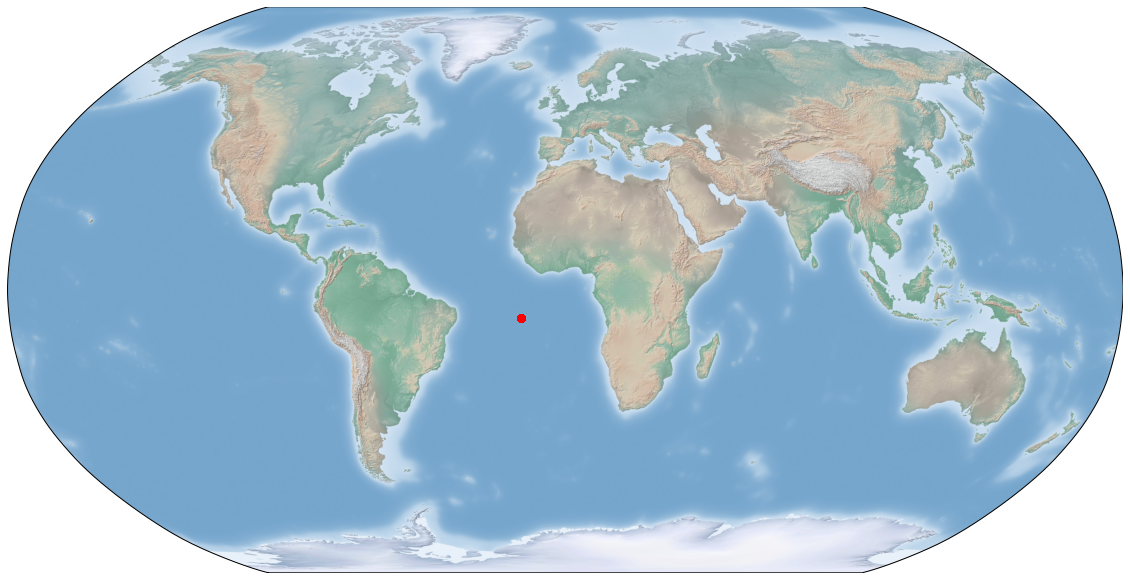

In [24]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='robin', resolution=None, lon_0=0)
m.shadedrelief()
m.scatter(lons, lats, latlon=True, s=50, c='red')

### What is the target variable distribution?

In [26]:
x = np.array(var_values)
print('Mean:', x.mean())
print('STD:', x.std())

Mean: 1.7237814891834925e-10
STD: 8.627418222476273e-11


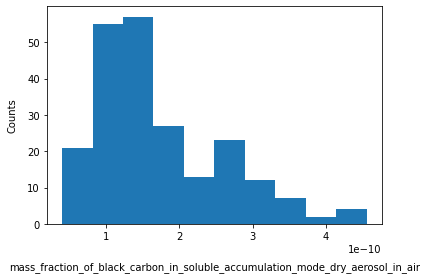

In [37]:
plt.figure()
plt.hist(x);
plt.xlabel(target_variable,labelpad=20)
plt.ylabel('Counts', labelpad=10);

# Look into Gaussian Process

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [40]:
X = df.to_numpy()
y = np.array(var_values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, random_state=42)

kernel = C(1.0, (1e-3, 1e-3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X_train,y_train)

In [54]:
print('Train score: ', gp.score(X_train,y_train))
print('Test score: ', gp.score(X_test,y_test))

Train score:  0.9999354047009614
Test score:  -0.6749357600226129


In [42]:
y_pred = gp.predict(X_test)

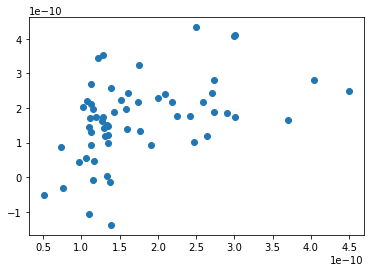

In [48]:
plt.figure()
plt.scatter(y_test, y_pred)

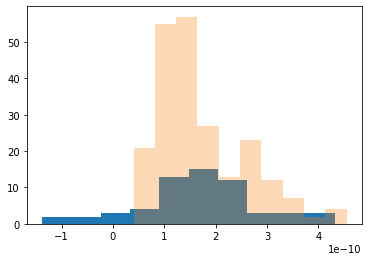

In [53]:
plt.figure()
plt.hist(y_pred);
plt.hist(y,alpha=0.3);